Data Analysis Interview Challenge

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#load packagee
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
#read the data
df = pd.read_json('logins.json')

In [3]:
#a time series dataframe
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#create initial count, and set the login_time as index, and sort the index in order
df['count'] = 1
df = df.set_index('login_time').sort_index()

In [5]:
#check the df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [6]:
#resample the data with 15mins frequency, and aggregate with the counts in the intervals 
df_15 = df.resample('15min').sum()
df_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
#create new column day of the week
df_15['day_of_week'] = df_15.index.day_name()

In [8]:
df_15.tail()

,count,day_of_week
login_time,,
1970-04-13 17:45:00,5,Monday
1970-04-13 18:00:00,5,Monday
1970-04-13 18:15:00,2,Monday
1970-04-13 18:30:00,7,Monday
1970-04-13 18:45:00,6,Monday


In [9]:
# check the time delta
dt = (df_15.index.max() - df_15.index.min())
print('The data covers {}'.format(df_15.index.max() - df_15.index.min()))
print("Number of 15 minute intervals between start and end dates: ", dt.total_seconds()/900 + 1)

The data covers 101 days 22:45:00
Number of 15 minute intervals between start and end dates:  9788.0


# Login counts patterns over time

Text(0, 0.5, 'Login counts')

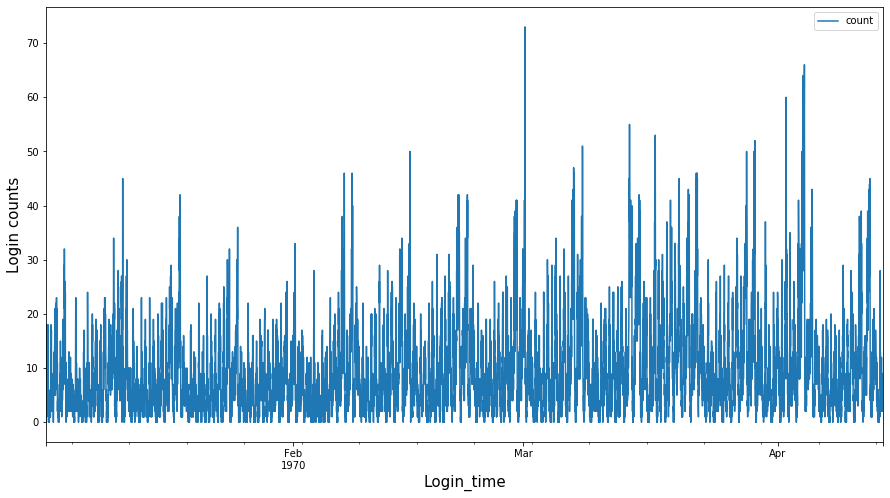

In [10]:
df_15.plot(figsize= (15,8))
plt.xlabel('Login_time', fontsize =15)
plt.ylabel('Login counts', fontsize =15)

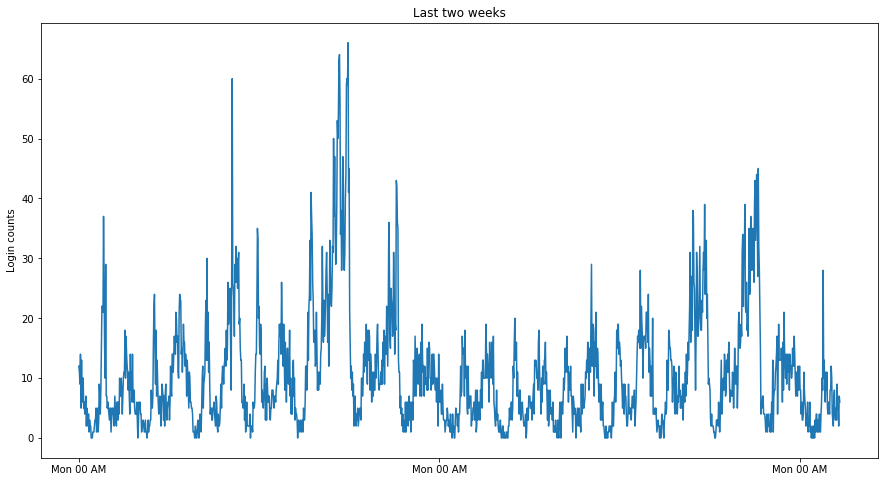

In [11]:
fig, ax = plt.subplots(figsize= (15,8))
ax.plot(df_15.loc['1970-03-30':'1970-04-13', 'count'], linestyle='-')
ax.set_ylabel('Login counts')
ax.set_title('Last two weeks')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %H %p'));

from the the login count from last two weeks, the obvious trend shown that during the weekend, there are high peaks of logins. we will look at the how login time looks during the day.

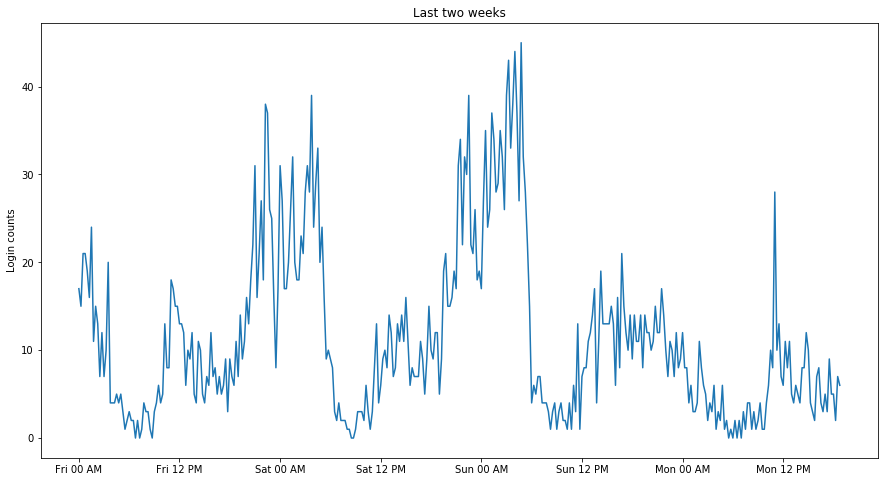

In [12]:
fig, ax = plt.subplots(figsize= (15,8))
ax.plot(df_15.loc['1970-04-10':'1970-04-13', 'count'], linestyle='-')
ax.set_ylabel('Login counts')
ax.set_title('Last two weeks')
# Set x-axis major ticks to weekly interval, on Mondays
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %H %p'));

The login times are frequent increasing from friday night to sat early morning, and from sat night to sunday early morning. and at both night, they dropped after midnight. For weekday, such as Monday, opposite pattern is shown that morining is a 'busy time, and low frequet login at midnight.